##Tarea 10.8

Primero llamaremos a las sumatorias:
$S_w = \sum w_i \approx 467.3611$$S_{wx} = \sum w_i x_i \approx 214.7222$$S_{wx^2} = \sum w_i x_i^2 \approx 103.9444$$S_{wy} = \sum w_i y_i \approx 4509.4236$$S_{wxy} = \sum w_i x_i y_i \approx 2127.1472$

Sustituyendo las sumatorias en el sistema de ecuaciones:$$467.3611 A + 214.7222 B = 4509.4236$$$$214.7222 A + 103.9444 B = 2127.1472$$El determinante ($D$) de la matriz de coeficientes es:$$D = S_w S_{wx^2} - (S_{wx})^2 \approx 2490.813$$Los resultados para $A$ y $B$ son:Parámetro A (Ordenada al origen):$$A = \frac{S_{wy} S_{wx^2} - S_{wxy} S_{wx}}{D}$$$$A \approx \frac{(4509.4236)(103.9444) - (2127.1472)(214.7222)}{2490.813}$$$$A \approx \frac{12015.87}{2490.813} \approx \mathbf{4.8242}$$Parámetro B (Pendiente):$$B = \frac{S_{w} S_{wxy} - S_{wy} S_{wx}}{D}$$$$B \approx \frac{(467.3611)(2127.1472) - (4509.4236)(214.7222)}{2490.813}$$$$B \approx \frac{26127.24}{2490.813} \approx \mathbf{10.4894}$$Ecuación de la Recta FinalLa línea recta de mejor ajuste es:$$f(x) \approx 4.8242 + 10.4894x$$

--- Sumatorias ---
Sw: 467.3611
Swx: 214.7222
Swx^2: 103.9444
Swy: 4509.4236
Swxy: 2127.1472

--- Solución del Sistema ---
Sistema a resolver:
[[467.36111111 214.72222222]
 [214.72222222 103.94444444]]
Vector c: [4509.42361111 2127.14722222]

Parámetros de la recta (A + Bx):
A (Ordenada al origen): 4.8440
B (Pendiente): 10.4579

Ecuación de la recta: y(x) = 4.8440 + 10.4579x


<>:65: SyntaxWarning: invalid escape sequence '\s'
<>:65: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2468965177.py:65: SyntaxWarning: invalid escape sequence '\s'
  label='Datos con incertidumbre ($\sigma_i$)', capsize=4)


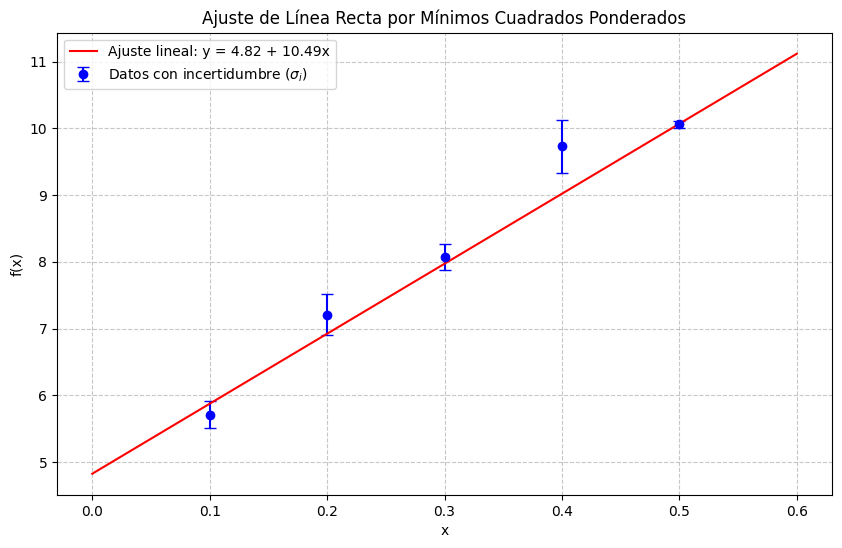

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
x_data = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
y_data = np.array([5.71, 7.21, 8.07, 9.73, 10.06])
sigma_data = np.array([0.2, 0.3, 0.2, 0.4, 0.05])

# 1. Cálculo de los Pesos (w_i = 1 / sigma_i^2)
weights = 1 / sigma_data**2

# 2. Cálculo de las sumatorias ponderadas
Sw = np.sum(weights)             # Sum(w_i)
Swx = np.sum(weights * x_data)   # Sum(w_i * x_i)
Swx2 = np.sum(weights * x_data**2) # Sum(w_i * x_i^2)
Swy = np.sum(weights * y_data)   # Sum(w_i * y_i)
Swxy = np.sum(weights * x_data * y_data) # Sum(w_i * x_i * y_i)

# 3. Definición del sistema de ecuaciones M * v = c
# Matriz de coeficientes M
M = np.array([
    [Sw, Swx],
    [Swx, Swx2]
])

# Vector de resultados c
c = np.array([Swy, Swxy])

# 4. Resolución del sistema de ecuaciones (v = M^-1 * c)
# La solución v contiene los parámetros [A, B]
v_solution = np.linalg.solve(M, c)
A = v_solution[0]
B = v_solution[1]

# Impresión de resultados
print("--- Sumatorias ---")
print(f"Sw: {Sw:.4f}")
print(f"Swx: {Swx:.4f}")
print(f"Swx^2: {Swx2:.4f}")
print(f"Swy: {Swy:.4f}")
print(f"Swxy: {Swxy:.4f}")
print("\n--- Solución del Sistema ---")
print(f"Sistema a resolver:")
print(M)
print(f"Vector c: {c}")

print(f"\nParámetros de la recta (A + Bx):")
print(f"A (Ordenada al origen): {A:.4f}")
print(f"B (Pendiente): {B:.4f}")
print(f"\nEcuación de la recta: y(x) = {A:.4f} + {B:.4f}x")

A = 4.8242
B = 10.4894


def linear_fit(x, A, B):
    return A + B * x

x_fit = np.linspace(min(x_data) - 0.1, max(x_data) + 0.1, 100)
y_fit = linear_fit(x_fit, A, B)

plt.figure(figsize=(10, 6))

plt.errorbar(x_data, y_data, yerr=sigma_data, fmt='o', color='blue',
             label='Datos con incertidumbre ($\sigma_i$)', capsize=4)

plt.plot(x_fit, y_fit, color='red', linestyle='-',
         label=f'Ajuste lineal: y = {A:.2f} + {B:.2f}x')

plt.title('Ajuste de Línea Recta por Mínimos Cuadrados Ponderados')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

Se ve un buen ajuste